In [214]:
from model.poisson_vhmm import PoissonVHMM
import jax
from numpy.random import gamma, poisson
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
### generate test data

cluster_num = 2
batch = 10
time = 100

pi_dirichlet = 5. * np.ones(cluster_num)
A_dirichlet = 10. * np.eye(cluster_num) + 1.0 * np.ones((cluster_num, cluster_num))

pi = np.random.dirichlet(pi_dirichlet)
A = np.array([np.random.dirichlet(A_dirichlet[i]) for i in range(cluster_num)])

lam_gamma_a = 3.
lam_gamma_b = 0.01

lam = np.random.gamma(lam_gamma_a, 1/lam_gamma_b, size=cluster_num)

state = np.zeros((time, batch), dtype=np.int16)
for i in range(time):
    if i == 0:
        state[0] = np.random.multinomial(n=1, pvals=pi, size=state[0].shape).argmax(-1)
    else:
        for b in range(batch):
            state[i][b] = np.random.multinomial(n=1, pvals=A[state[i-1][b]], size=1).argmax(-1)

obs = np.zeros((time, batch, cluster_num))
for i in range(time):
    for b in range(batch):
        obs[i][b] = np.random.poisson(lam[state[i][b]])


In [144]:
print(A)
print(pi)

[[0.9049637  0.0950363 ]
 [0.09334016 0.90665984]]
[0.61337867 0.38662133]


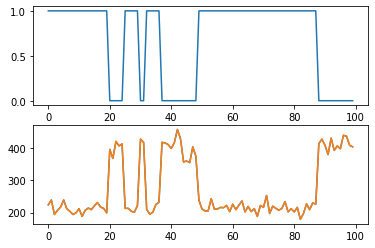

In [30]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(state[:, 0])
plt.subplot(2, 1, 2)
plt.plot(obs[:, 0])


In [219]:
import jax.numpy as jnp
cluster_num = 2
model = PoissonVHMM(cluster_num,
                    init_state_prior=jnp.array([3., 3.1]),
                    transition_prior=3*jnp.eye(cluster_num) +  1.0 * np.ones((cluster_num, cluster_num)),
                    poisson_prior=jnp.array([3., 0.01]))

In [220]:
gamma, viterbi = model.fit(jnp.array(obs))

-37721.547
-363.93866
0.0056702215
1389.3861
0.0
-38747.0
-37316.867
-364.18854
2.7032554
1389.4135
0.0
-38344.797
-2277.3403
-367.0292
3095.2383
1388.8352
0.0
-6394.385
1561.5759
-383.67914
116001.02
1378.5686
123.850525
-115558.19
1561.5759
-383.67914
119878.98
1378.5686
37.399933
-119349.69
1561.5759
-383.67914
119888.18
1378.5686
18.396885
-119339.89
1561.5759
-383.67914
119888.3
1378.5686
18.386734
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.386736
-119340.0
1561.5759
-383.67914
119888.3
1378.5686
18.

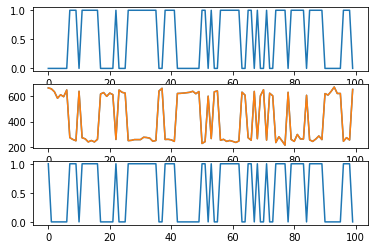

In [221]:
plt.subplot(3, 1, 1)
plt.plot(state[:, 0])
plt.subplot(3, 1, 2)
plt.plot(obs[:, 0])
plt.subplot(3, 1, 3)
plt.plot(viterbi[:, 0])

None
